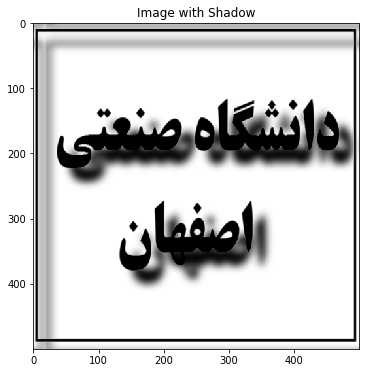

In [143]:
"""
MultiMedia Homework 4
-----------------------------
Author : Maryam Saeedmehr
Std NO.: 9629373
----------------------------------------------------------------------
# Note :
    * dst = cv.GaussianBlur(src, ksize, sigmaX, sigmaY, borderType) :
    
    src---------> It is an input image.
    
    dst---------> It is an output image.
    
    ksize-------> It is a Gaussian Kernel Size.[height width].The height and width should 
                  be odd and can have different values. If ksize is set to [0 0], then 
                  ksize is computed from the sigma values.
                  
    sigmaX------> It is a kernel standard deviation along X-axis (horizontal direction).
    
    sigmaY------> It is a kernel standard deviation along Y-axis (vertical direction). 
                  If sigmaY=0, then sigmaX value is taken for sigmaY
                  
    borderType--> Specifies image boundaries while the kernel is applied on image borders.
                  Possible values are cv.BORDER_CONSTANT cv.BORDER_REPLICATE cv.BORDER_REFLECT 
                  cv.BORDER_WRAP cv.BORDER_REFLECT_101 cv.BORDER_TRANSPARENT cv.BORDER_REFLECT101 
                  cv.BORDER_DEFAULT cv.BORDER_ISOLATED
"""

# Question 1 : shadow

import cv2 as cv # for reading image
import numpy as np # some mathematic calculation
import matplotlib.pyplot as plt # plot results

def H4_Shadow(I, s, d):
    # Apply Gaussian filter on the image I-------------------
    blured_img = cv.GaussianBlur(I, (35, 35), d)
    
    # Shift the blur image by 's'----------------------------
    [column, row] = I.shape
    Diagonal_down_right = np.copy(I)
    for i in range(row):
        for j in range(column):
            Diagonal_down_right[(i+s)%row][(j+s)%column] = blured_img[i][j];
            
    # Add shadow to the image---------------------------------
    shadow_image = np.minimum(I,Diagonal_down_right)
    
    # Plot the results----------------------------------------
    plt.figure(figsize=(8, 6))
    plt.title('Image with Shadow')
    plt.imshow(shadow_image, cmap='gray')
    

# Test the function ---------------------------------------------------------------
I = cv.imread('IUT_H4.bmp', 0)
H4_Shadow(I, 20, 6)

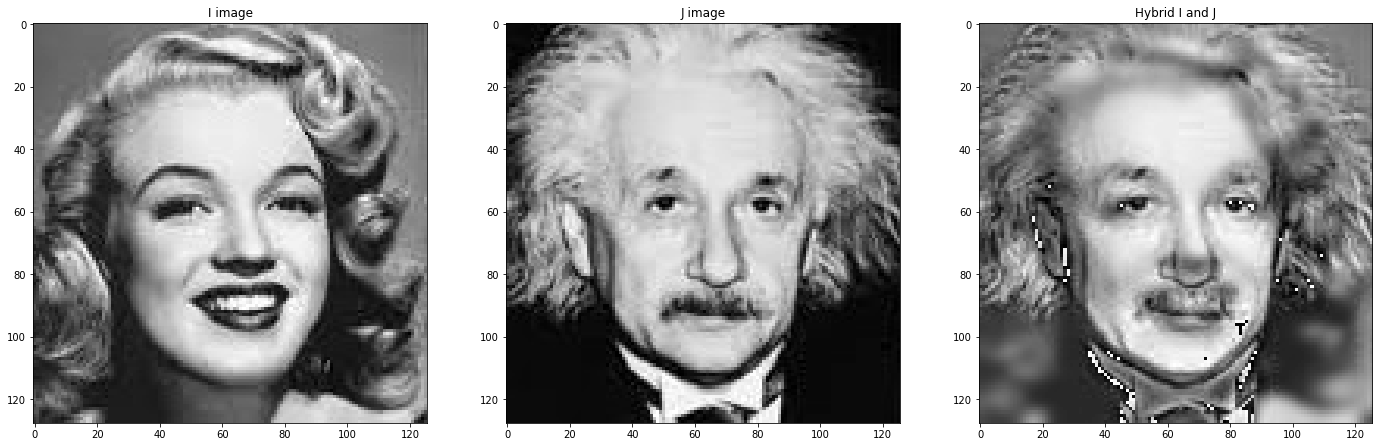

In [144]:
# Question 2 : Hybrid two image

import cv2 as cv # for reading image
import numpy as np # some mathematic calculation
import matplotlib.pyplot as plt # plot results

def H4_hybrid(I, J, m, n):
    # Make I and J the same size----------------------------
    [column, row] = I.shape
    J_resized = cv.resize(J, (row, column))
    
    # Get Low Freq. of image I------------------------------
    I_gaussian = cv.GaussianBlur(I, (35, 35), m)
    
    # Get High Freq. of Image J-----------------------------
    J_gaussian = cv.GaussianBlur(J_resized, (35, 35), n)
    J_HFreq = J_resized - J_gaussian

    # Make Hybrid image from I and J------------------------
    Hybrid_img = I_gaussian + J_HFreq
    
    # Plot the results--------------------------------------
    plt.figure(figsize=(24,18))
    plt.subplot(131)
    plt.title('I image')
    plt.imshow(I, cmap='gray')
    plt.subplot(132)
    plt.title('J image')
    plt.imshow(J_resized, cmap='gray')
    plt.subplot(133)
    plt.title('Hybrid I and J')
    plt.imshow(Hybrid_img, cmap='gray')
    
    
# Test the function ---------------------------------------------------------------
I = cv.imread('I.jpeg', 0)
J = cv.imread('J.jpeg', 0)

H4_hybrid(I, J, 2, 2)